In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Import the data

In [3]:
cars = pd.read_csv("data/autoscout24-germany-dataset.csv")

In [4]:
one_brand_lin_reg = cars.copy()

In [5]:
cars.shape

(46405, 9)

In [6]:
cars = cars.drop_duplicates()

In [7]:
cars.reset_index()

,index,mileage,make,model,fuel,gear,offerType,price,hp,year
0,0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...,...
44260,46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
44261,46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
44262,46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
44263,46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021


In [8]:
cars[(cars["model"] == "Panda") & (cars["mileage"] == 15)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
195,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10680,69.0,2021
197,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021


In [9]:
cars.shape

(44265, 9)

In [10]:
cars.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

In [11]:
cars.isnull().sum()

mileage        0
make           0
model        137
fuel           0
gear         175
offerType      0
price          0
hp            24
year           0
dtype: int64

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44265 entries, 0 to 46399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    44265 non-null  int64  
 1   make       44265 non-null  object 
 2   model      44128 non-null  object 
 3   fuel       44265 non-null  object 
 4   gear       44090 non-null  object 
 5   offerType  44265 non-null  object 
 6   price      44265 non-null  int64  
 7   hp         44241 non-null  float64
 8   year       44265 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


In [13]:
# emissions = pd.read_csv("data/CO2 Emissions_Canada.csv")

In [14]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,44265.0,72257.331368,62360.568861,0.0,21429.0,61111.0,106000.0,1111111.0
price,44265.0,16553.633909,19457.985663,1100.0,7490.0,10990.0,19490.0,1199900.0
hp,44241.0,133.609209,75.380845,1.0,86.0,116.0,150.0,850.0
year,44265.0,2015.932769,3.120088,2011.0,2013.0,2016.0,2019.0,2021.0


In [15]:
cars = cars.dropna()

In [16]:
#Functions

def get_data_info(dataset):
    """
    Returns the number of observations and features in the provided dataset
    """
    observations, features = dataset.shape
    return f"{observations} number of observations with {features} features"

def get_min_max_values(dataset, list_of_features):
    """
    Returns name, min, mean, max and std for each feature
    """
    print ("{:<10} {:<10} {:<10} {:<10} {:<10}".format('Feature','Min','Mean','Max', 'STD'))
    for feature in list_of_features:
        min_val = dataset[feature].min()
        mean_val = f"{dataset[feature].mean():.2f}"
        max_val = dataset[feature].max()
        std = f"{dataset[feature].std():.2f}"
        
        print ("{:<10} {:<10} {:<10} {:<10}{:<10}".format(feature, min_val, mean_val, max_val, std))

In [17]:
get_min_max_values(cars, ["mileage", "price", "hp", "year"])

Feature    Min        Mean       Max        STD       
mileage    0          72312.58   1111111   62173.36  
price      1100       16546.56   1199900   19446.80  
hp         1.0        133.62     850.0     75.05     
year       2011       2015.93    2021      3.12      


In [18]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,43947.0,72312.581268,62173.361585,0.0,21500.0,61309.0,106000.0,1111111.0
price,43947.0,16546.563793,19446.802828,1100.0,7490.0,10990.0,19490.0,1199900.0
hp,43947.0,133.624571,75.049853,1.0,86.0,116.0,150.0,850.0
year,43947.0,2015.931349,3.120073,2011.0,2013.0,2016.0,2019.0,2021.0


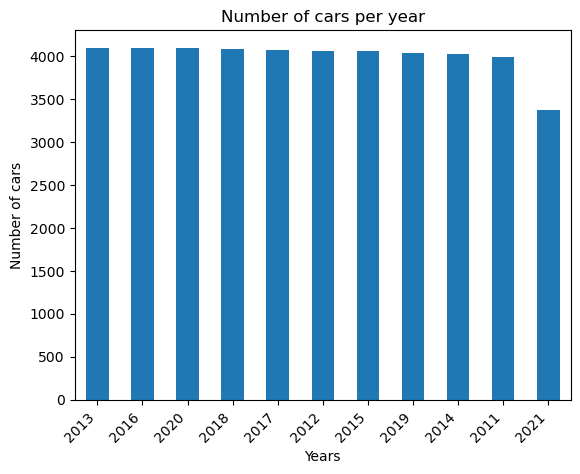

In [19]:
cars["year"].value_counts() \
    .plot(kind="bar")
plt.xlabel("Years")
plt.ylabel("Number of cars")
plt.title("Number of cars per year")
plt.xticks(rotation=45, ha='right')
plt.show()

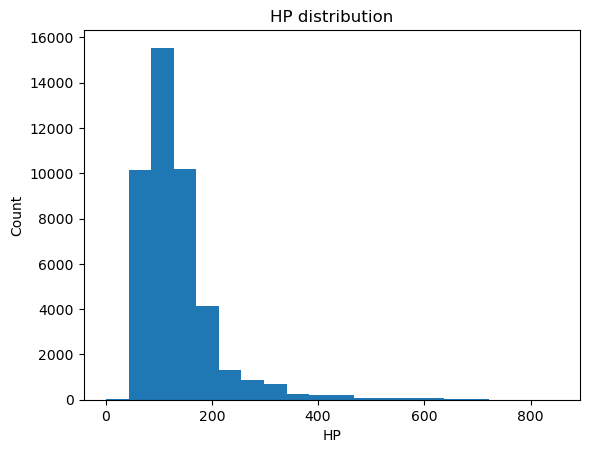

In [20]:
cars["hp"].plot(kind = "hist", \
                bins = 20, \
                title = "HP distribution")
plt.xlabel("HP")
plt.ylabel("Count")
plt.show()

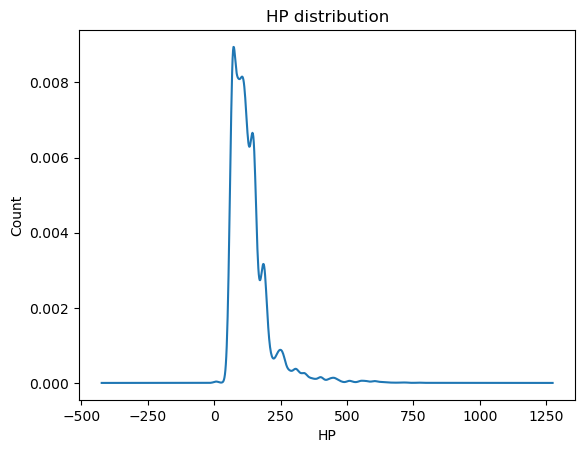

In [21]:
cars["hp"].plot(kind = "kde", \
                title = "HP distribution")
plt.xlabel("HP")
plt.ylabel("Count")
plt.show()

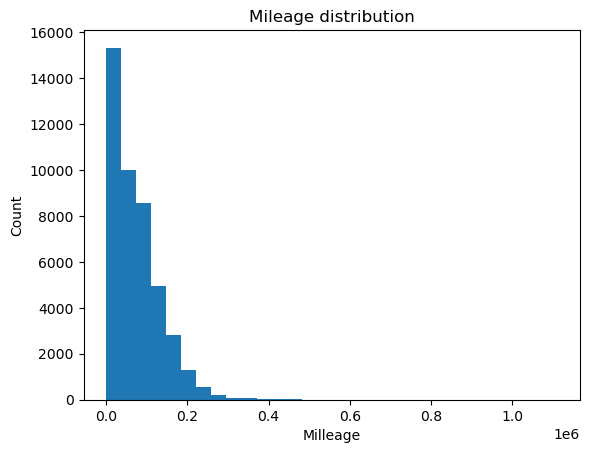

In [22]:
cars["mileage"].plot(kind = "hist", \
                bins = 30, \
                title = "Mileage distribution")
plt.xlabel("Milleage")
plt.ylabel("Count")
plt.show()

In [23]:
cars

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021


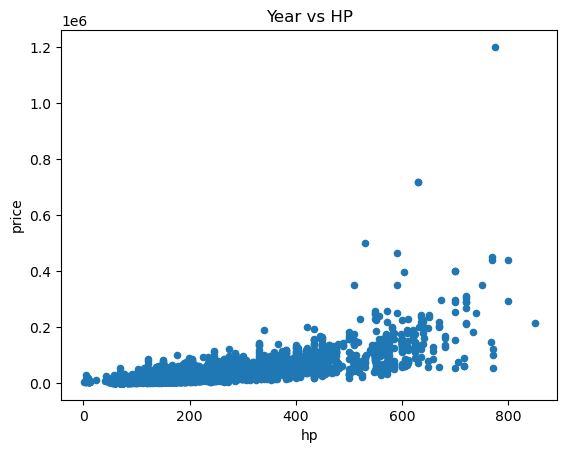

In [24]:
cars.plot(kind = "scatter", \
         x = "hp", \
         y = "price", \
         title = "Year vs HP")
plt.show()

In [25]:
cars.loc[cars['price'].idxmax()]

mileage            431
make           Ferrari
model              F12
fuel          Gasoline
gear         Automatic
offerType         Used
price          1199900
hp               775.0
year              2017
Name: 21675, dtype: object

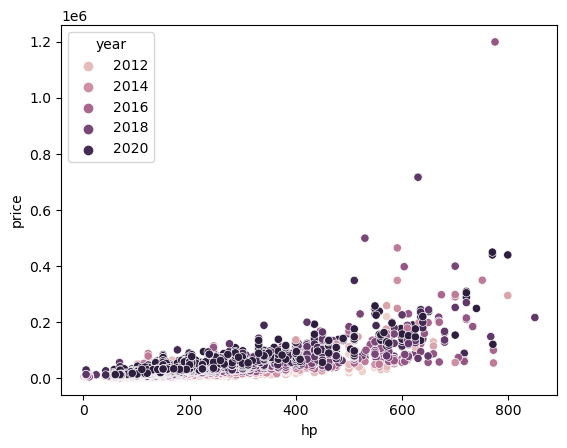

In [26]:
sns.scatterplot(x = "hp", \
                y = "price", \
               hue = "year", \
               data = cars)
plt.show()

In [27]:
cars[cars["price"] > 1000000]

,mileage,make,model,fuel,gear,offerType,price,hp,year
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017


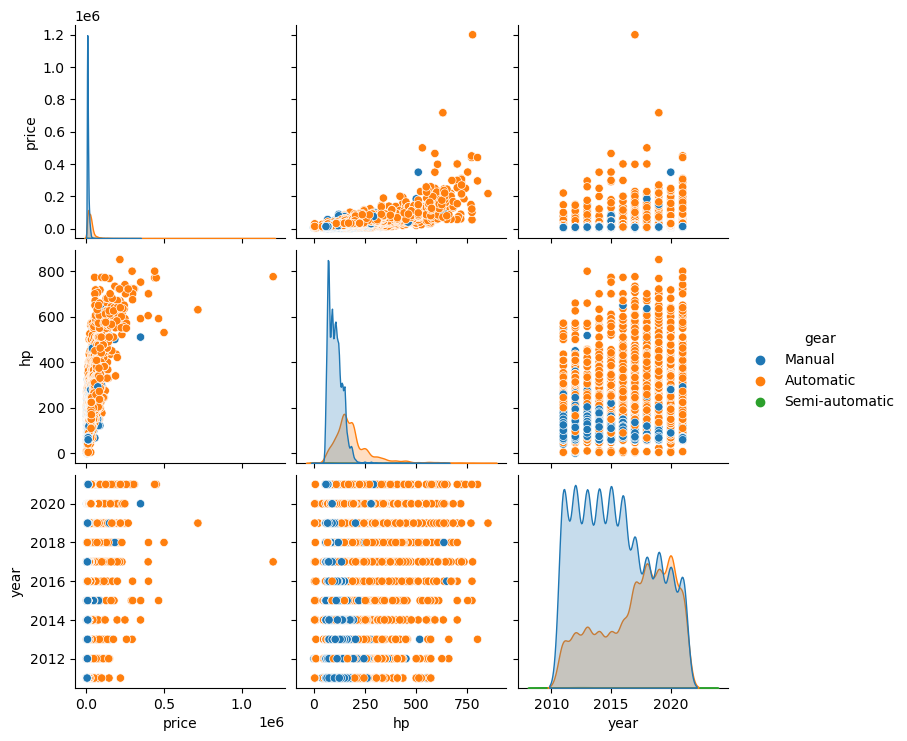

In [28]:
sns.pairplot(cars, vars = ["price", "hp", "year"], hue = "gear")
plt.show()

In [29]:
cars[["price", "mileage", "hp", "year"]].corr()

,price,mileage,hp,year
price,1.000000,-0.305598,0.745003,0.411415
mileage,-0.305598,1.000000,-0.022912,-0.670614
hp,0.745003,-0.022912,1.000000,0.181946
year,0.411415,-0.670614,0.181946,1.000000


In [30]:
cars[["price", "mileage", "hp", "year"]].dropna().corr()

,price,mileage,hp,year
price,1.000000,-0.305598,0.745003,0.411415
mileage,-0.305598,1.000000,-0.022912,-0.670614
hp,0.745003,-0.022912,1.000000,0.181946
year,0.411415,-0.670614,0.181946,1.000000


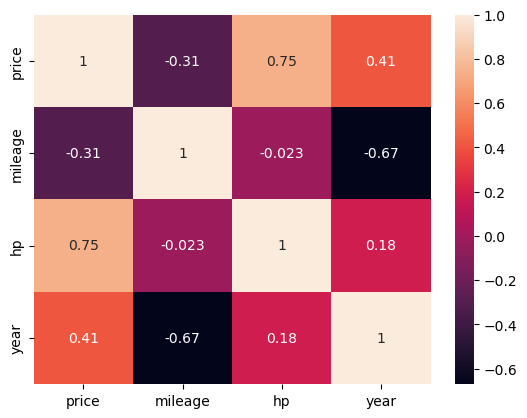

In [31]:
sns.heatmap(cars[["price", "mileage", "hp", "year"]].dropna().corr(), annot = True)
plt.show()

In [32]:
# Speed test

In [33]:
import time 
a = time.perf_counter()
r = min(cars["year"])
b = time.perf_counter()
print(r)
print(b - a)

2011
0.01176765099808108


In [34]:
import time 
a = time.perf_counter()
r = cars["year"].min()
b = time.perf_counter()
print(r)
print(b - a)

2011
0.0008259919995907694


In [35]:
cars.groupby(cars["make"]).size()

make
Abarth          41
Aixam            2
Alfa           128
Alpina          10
Alpine           1
              ... 
Toyota        1143
Volkswagen    6680
Volvo          775
Zhidou           1
smart          916
Length: 71, dtype: int64

In [36]:
cars

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021


In [37]:
list(cars["gear"].unique())

['Manual', 'Automatic', 'Semi-automatic']

In [38]:
grouped_models = cars.groupby(cars["gear"]).size()

In [39]:
unique_models = list(cars["gear"].dropna().unique())

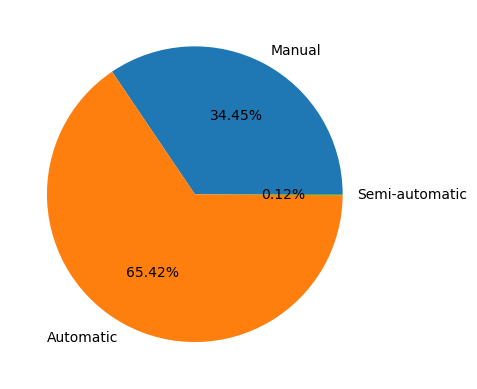

In [40]:
plt.pie(labels = unique_models ,x = [i for i in grouped_models],autopct = "%.2f%%")
plt.show()

In [41]:
cars

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021


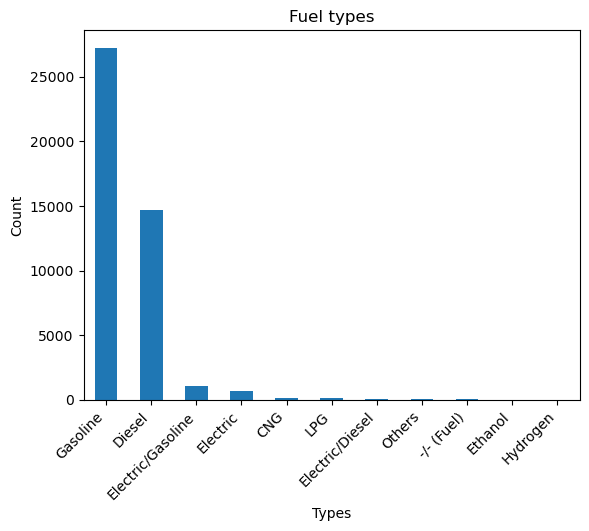

In [42]:
cars["fuel"].value_counts() \
    .plot(kind="bar")
plt.xlabel("Types")
plt.ylabel("Count")
plt.title("Fuel types")
plt.xticks(rotation=45, ha='right')
plt.show()

# One brand linear regression 

## Testing one brand mode with std to remove outliers

In [43]:
# Reusable function to calculate R^2, MEA and MSE

def calc_errors(metrics_module, train_data, pred_data):
    '''
    Returns R^2, MAE and MSE
    '''
    r_sqrt = metrics_module.r2_score(train_data, pred_data)
    mae = metrics_module.mean_absolute_error(train_data, pred_data)
    mse = metrics_module.mean_squared_error(train_data, pred_data)
    return r_sqrt, mae, mse

In [44]:
cars = pd.read_csv("data/autoscout24-germany-dataset.csv")

In [45]:
one_brand_lin_reg = cars.copy()

In [46]:
one_brand_lin_reg = one_brand_lin_reg.drop_duplicates()

In [47]:
one_brand_lin_reg = one_brand_lin_reg[(one_brand_lin_reg["make"] == "Opel")]

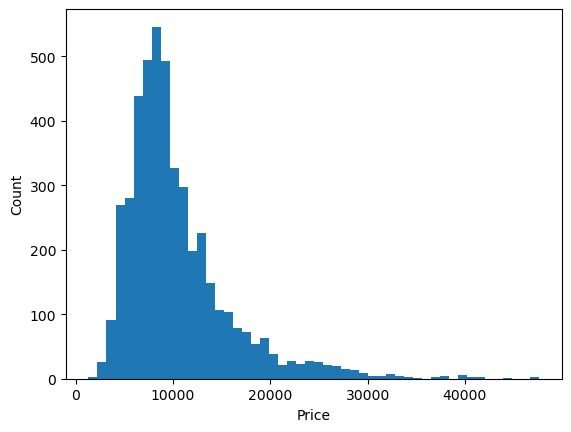

In [48]:
plt.hist(one_brand_lin_reg["price"], bins = 50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [49]:
one_brand_lin_reg = one_brand_lin_reg.dropna()

In [50]:
one_brand_lin_reg["make"].unique()

array(['Opel'], dtype=object)

In [51]:
one_brand_lin_reg = one_brand_lin_reg.drop(["make", "model", "fuel", "gear", "offerType"], axis=1)

In [52]:
upper_limit = one_brand_lin_reg["price"].mean() + 3 * one_brand_lin_reg["price"].std()

In [53]:
lower_limit = one_brand_lin_reg["price"].mean() - 3 * one_brand_lin_reg["price"].std()

In [54]:
one_brand_lin_reg = one_brand_lin_reg[(one_brand_lin_reg["price"] < upper_limit) &\
                                      (one_brand_lin_reg["price"] > lower_limit)]

In [55]:
# Now we can prepare our X and Y
X = one_brand_lin_reg.drop(["price"], axis = 1)
Y = one_brand_lin_reg["price"] #This is our target variable

In [56]:
# Step - 7 scale the features (mean 0, variance 1)
# We scale the features in order to avoid unrealistic results
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [57]:
np.random.seed(42) # We want the results to be reproducible 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [58]:
lin_reg_model = LinearRegression()

In [59]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [60]:
# Model evaluation 
# Prediction on the training data
training_data_prediction = lin_reg_model.predict(X_train)

In [61]:
# Calculate r2, mae, mse for the training data
r_sqrt, mae, mse = calc_errors(metrics, Y_train, training_data_prediction)

In [62]:
print(f"R^2: {r_sqrt:.2f}") 
print(f"MAE: {mae:.2f}") 
print(f"MAE: {mse:.2f}") 

R^2: 0.79
MAE: 1480.92
MAE: 4153462.03


In [63]:
one_brand_lin_reg["z_score"] = (one_brand_lin_reg["price"] - one_brand_lin_reg["price"].mean()) / one_brand_lin_reg["price"].std()

In [64]:
one_brand_lin_reg

,mileage,price,hp,year,z_score
7,127500,6972,116.0,2011,-0.659450
10,59580,6990,101.0,2011,-0.655414
19,82000,7000,101.0,2011,-0.653172
27,104250,7950,140.0,2012,-0.440167
30,105000,7980,179.0,2012,-0.433440
...,...,...,...,...,...
46097,5,23680,101.0,2021,3.086744
46157,10,25440,131.0,2021,3.481364
46158,855,25440,131.0,2021,3.481364
46159,10,25650,131.0,2021,3.528449


## Testing one brand mode with IQR to remove outliers

In [65]:
def calc_errors(metrics_module, train_data, pred_data):
    '''
    Returns R^2, MAE and MSE
    '''
    r_sqrt = metrics_module.r2_score(train_data, pred_data)
    mae = metrics_module.mean_absolute_error(train_data, pred_data)
    mse = metrics_module.mean_squared_error(train_data, pred_data)
    return r_sqrt, mae, mse


def train_and_predict(X_train, Y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    testing_data_prediction = model.predict(X_test)
    return testing_data_prediction


def split_data(x_scaled, Y):
    np.random.seed(42)  # We want the results to be reproducible
    X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=.3)
    return X_train, X_test, Y_train, Y_test


def apply_scale(X):
    '''
    Returns scaled X
    '''
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(X)
    return x_scaled


def prepare_x_y(df):
    '''
    Returns X and Y axis
    '''
    X = df.drop(["price"], axis=1)
    Y = df["price"]
    return X, Y


def apply_limits(df, lower_limit, upper_limit):
    '''
    Returns df after applying limits
    '''
    df = df[~(df["price"] > upper_limit) \
            | (df["price"] < lower_limit)]
    return df


def prepare_limits(df):
    '''
    Returns upper and lower limits for outliers detection
    '''
    Q1 = df["price"].quantile(0.25)
    Q3 = df["price"].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit_iqr = Q1 - (1.5 * IQR)
    upper_limit_iqr = Q3 + (1.5 * IQR)
    return lower_limit_iqr, upper_limit_iqr


def drop_columns(df, list_of_columns):
    '''
    Returns a df with dropped columns
    '''
    result = df.drop(list_of_columns, axis=1)
    return result


def create_model(df_orig):
    '''
    Returns a df with model comparison stats
    '''
    result = {'make': [],
              'r_squared': [],
              'MAE': [],
              'MSE': []}
    cols_to_drop = ["model", "fuel", "gear", "offerType"]
    df_orig = drop_columns(df_orig, cols_to_drop)
    df_orig = df_orig.drop_duplicates()
    df_orig = df_orig.dropna()
    for car in df_orig["make"].value_counts(ascending = False).nlargest(20).index:
        df_loop = df_orig[(df_orig["make"] == car)].copy()
        df_loop = drop_columns(df_loop, ["make"])
        lower_limit, upper_limit = prepare_limits(df_loop)
        df_loop = apply_limits(df_loop, lower_limit, upper_limit)
        X, Y = prepare_x_y(df_loop)
        x_scaled = apply_scale(X)
        X_train, X_test, Y_train, Y_test = split_data(x_scaled, Y)
        testing_data_prediction = train_and_predict(X_train, Y_train, X_test)
        r_sqrt, mae, mse = calc_errors(metrics, Y_test, testing_data_prediction)
        result['make'].append(car)
        result['r_squared'].append(r_sqrt)
        result['MAE'].append(mae)
        result['MSE'].append(mse)
    return result

In [66]:
cars = pd.read_csv("data/autoscout24-germany-dataset.csv")

In [67]:
new_df = pd.DataFrame.from_dict(create_model(cars))

In [68]:
new_df["r_squared"].mean()

0.8264893873071186

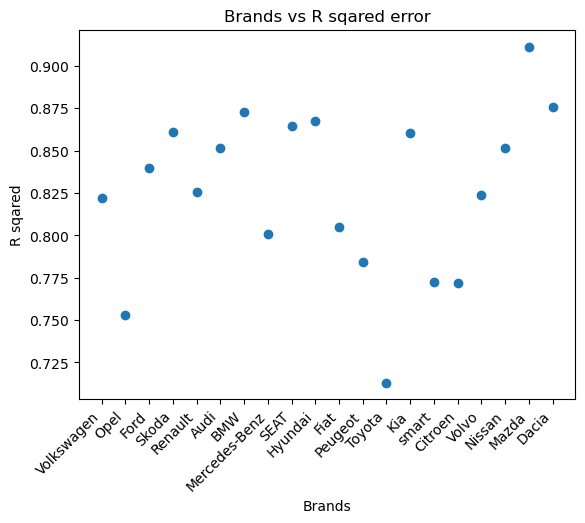

In [69]:
plt.scatter(new_df["make"], new_df["r_squared"])
plt.xlabel("Brands")
plt.ylabel("R sqared")
plt.title("Brands vs R sqared error")
plt.xticks(rotation=45, ha='right')
plt.show()

In [70]:
one_brand_lin_reg = cars.copy()

In [71]:
one_brand_lin_reg = one_brand_lin_reg.drop_duplicates()

In [72]:
one_brand_lin_reg = one_brand_lin_reg.dropna()

In [73]:
one_brand_lin_reg = one_brand_lin_reg[(one_brand_lin_reg["make"] == "BMW")]

In [74]:
one_brand_lin_reg = one_brand_lin_reg.drop(["make", "model", "fuel", "gear", "offerType"], axis=1)

In [75]:
Q1 = one_brand_lin_reg["price"].quantile(0.25)
Q3 = one_brand_lin_reg["price"].quantile(0.75)

In [76]:
IQR = Q3 - Q1

In [77]:
lower_limit_iqr = Q1 - (1.5 * IQR)
upper_limit_iqr = Q3 + (1.5 * IQR)

In [78]:
one_brand_lin_reg = one_brand_lin_reg[~(one_brand_lin_reg["price"] > upper_limit_iqr) \
                                      | (one_brand_lin_reg["price"] < lower_limit_iqr)]

In [79]:
# Now we can prepare our X and Y
X = one_brand_lin_reg.drop(["price"], axis = 1)
Y = one_brand_lin_reg["price"] #This is our target variable

In [80]:
Y

0         6800
26        7950
29        7980
33        7999
39        8199
         ...  
45202    35450
45203    35450
45920    32980
45929    43090
46295    38300
Name: price, Length: 2272, dtype: int64

In [81]:
# Step - 7 scale the features (mean 0, variance 1)
# We scale the features in order to avoid unrealistic results
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [82]:
np.random.seed(42) # We want the results to be reproducible 
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=.3)

In [83]:
lin_reg_model = LinearRegression()

In [84]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [85]:
# Model evaluation 
# Prediction on the training data
training_data_prediction = lin_reg_model.predict(X_test)

In [86]:
# Calculate r2, mae, mse for the training data
r_sqrt, mae, mse = calc_errors(metrics, Y_test, training_data_prediction)

In [87]:
print(f"R^2: {r_sqrt:.2f}") 
print(f"MAE: {mae:.2f}") 
print(f"MAE: {mse:.2f}") 

R^2: 0.87
MAE: 3274.64
MAE: 18757006.13


In [88]:
lin_reg_model.score(X_test, Y_test)

0.8745483520326673

# Build separate model for each brand - Automation

In [89]:
per_brand_experiment = cars.copy()

In [90]:
per_brand_experiment = per_brand_experiment.drop_duplicates()

In [91]:
per_brand_experiment = per_brand_experiment.dropna()

In [92]:
per_brand_experiment["make"]

0               BMW
1        Volkswagen
2              SEAT
3           Renault
4           Peugeot
            ...    
46394       Citroen
46396          Fiat
46397          Fiat
46398          Fiat
46399         Skoda
Name: make, Length: 43947, dtype: object

In [93]:
for el in cars["make"].value_counts(ascending = False).nlargest(10).index:
    print(el)

Volkswagen
Opel
Ford
Skoda
Renault
Audi
BMW
Mercedes-Benz
SEAT
Hyundai


In [94]:
cars["make"].value_counts(ascending = False).nlargest(10).index

Index(['Volkswagen', 'Opel', 'Ford', 'Skoda', 'Renault', 'Audi', 'BMW',
       'Mercedes-Benz', 'SEAT', 'Hyundai'],
      dtype='object')

# Work with CO2 emissions data

In [344]:
co2_emissions = pd.read_csv("data/CO2_Emissions_Canada.csv")


In [345]:
co2_emissions

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [346]:
# We will drop Fuel Consumption Comb (mpg) as we do not actually needed
co2_emissions = co2_emissions.drop(["Fuel Consumption Comb (mpg)", "Vehicle Class"], axis = 1)

In [347]:
co2_emissions.columns

Index(['Make', 'Model', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)'],
      dtype='object')

In [348]:
# Rename the columns snake case 
co2_emissions.columns = ["brand", "model", "engine_size",\
                        "cylinders", "transmission", "fuel_type", "consump_city",\
                        "consump_hwy", "consump_comb_km", "co2_emissions(g/km)"]

In [349]:
co2_emissions.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
consump_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
consump_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
consump_comb_km,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
co2_emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [350]:
# Now we need to identify the missing values
# Using isna and sum we will see the number of missing value per column
co2_emissions.isna().sum()

brand                  0
model                  0
engine_size            0
cylinders              0
transmission           0
fuel_type              0
consump_city           0
consump_hwy            0
consump_comb_km        0
co2_emissions(g/km)    0
dtype: int64

In [351]:
# Here we drop the duplicate values and reset the index
# The second command is needed in order to have a properly structured index
co2_emissions = co2_emissions.drop_duplicates()
co2_emissions.reset_index(drop = True)

,brand,model,engine_size,cylinders,transmission,fuel_type,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
0,ACURA,ILX,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,3.5,6,AS6,Z,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...
6266,VOLVO,XC40 T5 AWD,2.0,4,AS8,Z,10.7,7.7,9.4,219
6267,VOLVO,XC60 T5 AWD,2.0,4,AS8,Z,11.2,8.3,9.9,232
6268,VOLVO,XC60 T6 AWD,2.0,4,AS8,Z,11.7,8.6,10.3,240
6269,VOLVO,XC90 T5 AWD,2.0,4,AS8,Z,11.2,8.3,9.9,232


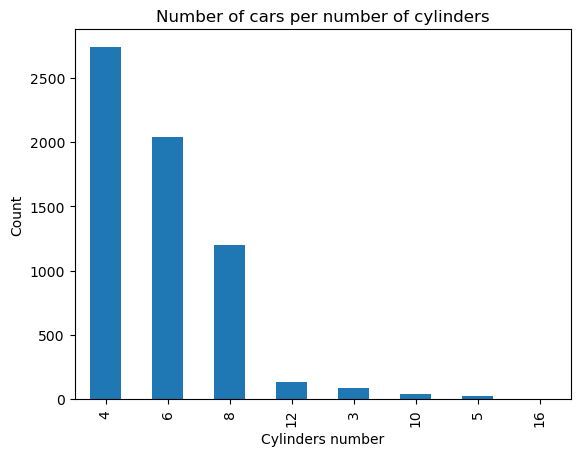

In [352]:
# Bars to visualize the number of cars per number of cylinders
co2_emissions["cylinders"].value_counts() \
    .plot(kind="bar")
plt.xlabel("Cylinders number")
plt.ylabel("Count")
plt.title("Number of cars per number of cylinders")
plt.show()

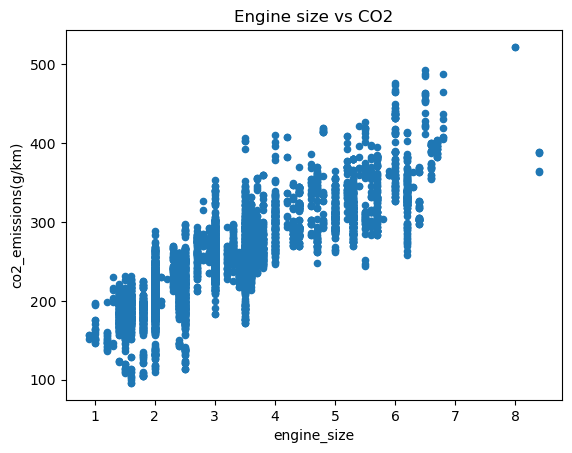

In [353]:
# Now let's check how engine size and co2 features are related:
co2_emissions.plot(kind = "scatter", \
         x = "engine_size", \
         y = "co2_emissions(g/km)", \
         title = "Engine size vs CO2")
plt.show()

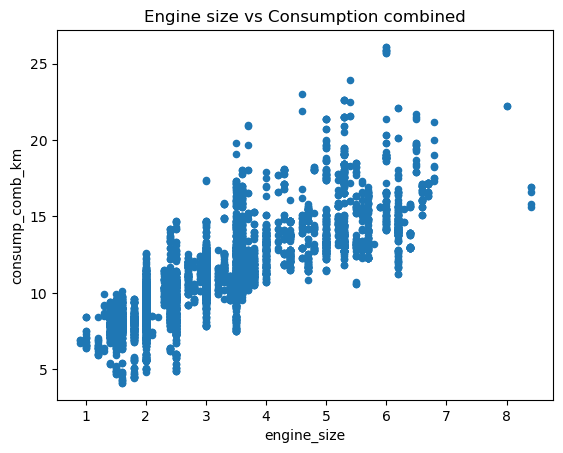

In [354]:
# Now let's check how engine size and consumption combined features are related:
co2_emissions.plot(kind = "scatter", \
         x = "engine_size", \
         y = "consump_comb_km", \
         title = "Engine size vs Consumption combined")
plt.show()

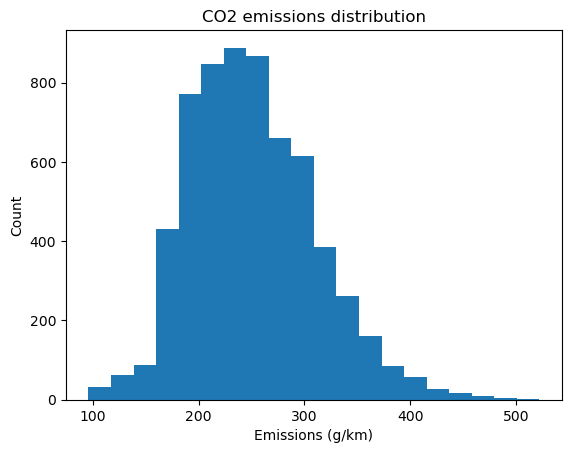

In [355]:
# Now let's see the distribution of CO2 emissions 
co2_emissions["co2_emissions(g/km)"].plot(kind = "hist", \
                bins = 20, \
                title = "CO2 emissions distribution")
plt.xlabel("Emissions (g/km)")
plt.ylabel("Count")
plt.show()

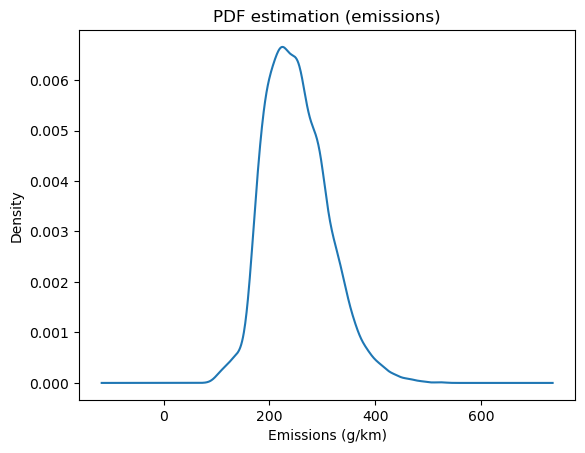

In [356]:
# Using kernel density estimation (KDE) we can also estimate the probability density of emissions column
co2_emissions["co2_emissions(g/km)"].plot(kind = "kde", \
                title = "PDF estimation (emissions)")
plt.xlabel("Emissions (g/km)")
plt.show()

In [357]:
# Extract the numberical columns
numeric_cols = [c for c in co2_emissions if pd.api.types.is_numeric_dtype(co2_emissions[c])]

In [358]:
#Double check and create correlation matrix
co2_emissions[numeric_cols].dropna().corr()

,engine_size,cylinders,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
engine_size,1.000000,0.928804,0.834183,0.766780,0.820110,0.854773
cylinders,0.928804,1.000000,0.801107,0.717434,0.780915,0.834567
consump_city,0.834183,0.801107,1.000000,0.950767,0.994047,0.918645
consump_hwy,0.766780,0.717434,0.950767,1.000000,0.978587,0.883278
consump_comb_km,0.820110,0.780915,0.994047,0.978587,1.000000,0.916725
co2_emissions(g/km),0.854773,0.834567,0.918645,0.883278,0.916725,1.000000


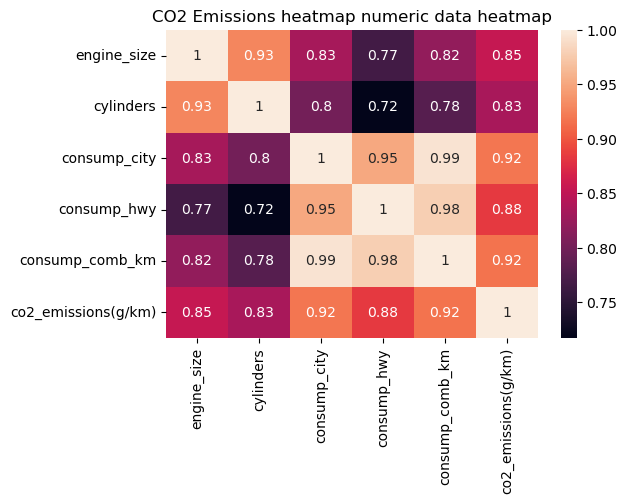

In [359]:
# We can also look at a heatmap
plt.figure(figsize = (6,4))
sns.heatmap(co2_emissions[numeric_cols].dropna().corr(), annot = True)
plt.title("CO2 Emissions heatmap numeric data heatmap")
plt.show()

In [360]:
co2_emissions.groupby(["brand", "model"]).size()

brand  model         
ACURA  ILX               7
       ILX HYBRID        2
       MDX 4WD           1
       MDX HYBRID AWD    1
       MDX Hybrid AWD    1
                        ..
VOLVO  XC70 T6 AWD       1
       XC90 AWD          1
       XC90 T5           1
       XC90 T5 AWD       4
       XC90 T6 AWD       5
Length: 2053, dtype: int64

In [361]:
cars

,mileage,brand,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [364]:
co2_emissions["model"] = co2_emissions["model"].str.split(pat=' ', n=1, expand=True)[0]

In [365]:
co2_emissions["brand"] = co2_emissions["brand"].str.capitalize()

In [366]:
co2_emissions

,brand,model,engine_size,cylinders,transmission,fuel_type,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
0,Acura,ILX,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,Acura,ILX,2.4,4,M6,Z,11.2,7.7,9.6,221
2,Acura,ILX,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,Acura,MDX,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,Acura,RDX,3.5,6,AS6,Z,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...
7380,Volvo,XC40,2.0,4,AS8,Z,10.7,7.7,9.4,219
7381,Volvo,XC60,2.0,4,AS8,Z,11.2,8.3,9.9,232
7382,Volvo,XC60,2.0,4,AS8,Z,11.7,8.6,10.3,240
7383,Volvo,XC90,2.0,4,AS8,Z,11.2,8.3,9.9,232


In [367]:
#Update automatic transmissions
co2_emissions["transmission"] = np.where(co2_emissions["transmission"].str.contains('A', case=True, regex=True),\
         "Automatic", co2_emissions["transmission"])

In [368]:
#Rename manual transmissions
co2_emissions["transmission"] = np.where(co2_emissions["transmission"].str.contains('M', case=True, regex=True),\
         "Manual", co2_emissions["transmission"])

In [369]:
co2_emissions["fuel_type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [370]:
cars["fuel"].unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [371]:
#Fix Gasoline fuel type
co2_emissions["fuel_type"] = np.where(co2_emissions["fuel_type"].str.contains('X|Z', case=True, regex=True),\
         "Gasoline", co2_emissions["fuel_type"])

In [372]:
#Fix Diesel fuel type
co2_emissions["fuel_type"] = np.where(co2_emissions["fuel_type"].str.contains('D', case=True, regex=True),\
         "Diesel", co2_emissions["fuel_type"])

In [373]:
#Fix Ethanol fuel type
co2_emissions["fuel_type"] = np.where(co2_emissions["fuel_type"].str.contains('E', case=True, regex=True),\
         "Ethanol", co2_emissions["fuel_type"])

In [374]:
#Fix LPG fuel type
co2_emissions["fuel_type"] = np.where(co2_emissions["fuel_type"].str.contains('N', case=True, regex=True),\
         "LPG", co2_emissions["fuel_type"])

In [375]:
co2_emissions["fuel_type"].unique()

array(['Gasoline', 'Diesel', 'Ethanol', 'LPG'], dtype=object)

In [376]:
co2_emissions

,brand,model,engine_size,cylinders,transmission,fuel_type,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
0,Acura,ILX,2.0,4,Automatic,Gasoline,9.9,6.7,8.5,196
1,Acura,ILX,2.4,4,Manual,Gasoline,11.2,7.7,9.6,221
2,Acura,ILX,1.5,4,Automatic,Gasoline,6.0,5.8,5.9,136
3,Acura,MDX,3.5,6,Automatic,Gasoline,12.7,9.1,11.1,255
4,Acura,RDX,3.5,6,Automatic,Gasoline,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...
7380,Volvo,XC40,2.0,4,Automatic,Gasoline,10.7,7.7,9.4,219
7381,Volvo,XC60,2.0,4,Automatic,Gasoline,11.2,8.3,9.9,232
7382,Volvo,XC60,2.0,4,Automatic,Gasoline,11.7,8.6,10.3,240
7383,Volvo,XC90,2.0,4,Automatic,Gasoline,11.2,8.3,9.9,232


In [377]:
co2_emissions

,brand,model,engine_size,cylinders,transmission,fuel_type,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
0,Acura,ILX,2.0,4,Automatic,Gasoline,9.9,6.7,8.5,196
1,Acura,ILX,2.4,4,Manual,Gasoline,11.2,7.7,9.6,221
2,Acura,ILX,1.5,4,Automatic,Gasoline,6.0,5.8,5.9,136
3,Acura,MDX,3.5,6,Automatic,Gasoline,12.7,9.1,11.1,255
4,Acura,RDX,3.5,6,Automatic,Gasoline,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...
7380,Volvo,XC40,2.0,4,Automatic,Gasoline,10.7,7.7,9.4,219
7381,Volvo,XC60,2.0,4,Automatic,Gasoline,11.2,8.3,9.9,232
7382,Volvo,XC60,2.0,4,Automatic,Gasoline,11.7,8.6,10.3,240
7383,Volvo,XC90,2.0,4,Automatic,Gasoline,11.2,8.3,9.9,232


In [378]:
cars.head(5)

,mileage,brand,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [379]:
co2_emissions.head(5)

,brand,model,engine_size,cylinders,transmission,fuel_type,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
0,Acura,ILX,2.0,4,Automatic,Gasoline,9.9,6.7,8.5,196
1,Acura,ILX,2.4,4,Manual,Gasoline,11.2,7.7,9.6,221
2,Acura,ILX,1.5,4,Automatic,Gasoline,6.0,5.8,5.9,136
3,Acura,MDX,3.5,6,Automatic,Gasoline,12.7,9.1,11.1,255
4,Acura,RDX,3.5,6,Automatic,Gasoline,12.1,8.7,10.6,244


In [380]:
co2_emissions.groupby(["brand", "model"])["co2_emissions(g/km)"].mean()

brand  model
Acura  ILX      186.444444
       MDX      246.272727
       NSX      261.000000
       RDX      243.000000
       RLX      200.571429
                   ...    
Volvo  V90      218.750000
       XC40     213.333333
       XC60     242.500000
       XC70     247.714286
       XC90     244.636364
Name: co2_emissions(g/km), Length: 555, dtype: float64

In [381]:
test = co2_emissions.groupby(["brand", "model"])["co2_emissions(g/km)"]

In [382]:
co2_emissions.groupby(["brand", "model"])["co2_emissions(g/km)"].mean()

brand  model
Acura  ILX      186.444444
       MDX      246.272727
       NSX      261.000000
       RDX      243.000000
       RLX      200.571429
                   ...    
Volvo  V90      218.750000
       XC40     213.333333
       XC60     242.500000
       XC70     247.714286
       XC90     244.636364
Name: co2_emissions(g/km), Length: 555, dtype: float64

In [383]:
co2_emissions_mean_dict = {"brand": [], "model": [], "co2_emissions_mean(g/km)": []}
for el in co2_emissions.groupby(["brand", "model"]):
    co2_emissions_mean_dict["brand"].append(el[0][0])
    co2_emissions_mean_dict["model"].append(el[0][1])
    co2_emissions_mean_dict["co2_emissions_mean(g/km)"].append(round(el[1]["co2_emissions(g/km)"].mean(), 2))

In [384]:
co2_emissions_mean = pd.DataFrame.from_dict(co2_emissions_mean_dict)

In [385]:
co2_emissions_mean.head(2)

,brand,model,co2_emissions_mean(g/km)
0,Acura,ILX,186.44
1,Acura,MDX,246.27


In [386]:
cars.head(2)

,mileage,brand,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011


In [387]:
test_df = co2_emissions_mean.merge(cars, how = "inner", on = ["brand", "model"])

In [388]:
test_df.isna().sum()

brand                        0
model                        0
co2_emissions_mean(g/km)     0
mileage                      0
fuel                         0
gear                        30
offerType                    0
price                        0
hp                           5
year                         0
dtype: int64

In [389]:
test_df = test_df.dropna()

In [390]:
test_df

,brand,model,co2_emissions_mean(g/km),mileage,fuel,gear,offerType,price,hp,year
0,Audi,A3,204.56,276000,Diesel,Manual,Used,4900,140.0,2012
1,Audi,A3,204.56,15500,Gasoline,Manual,Used,27940,150.0,2019
2,Audi,A3,204.56,66000,Gasoline,Automatic,Used,17990,150.0,2018
3,Audi,A3,204.56,14900,Electric/Gasoline,Automatic,Demonstration,34750,204.0,2020
4,Audi,A3,204.56,9986,Gasoline,Automatic,Used,34950,150.0,2020
...,...,...,...,...,...,...,...,...,...,...
10038,Volvo,XC90,244.64,11223,Electric/Gasoline,Automatic,Used,62450,250.0,2020
10039,Volvo,XC90,244.64,19200,Diesel,Automatic,Used,66990,235.0,2020
10040,Volvo,XC90,244.64,1000,Diesel,Automatic,Demonstration,69890,235.0,2021
10041,Volvo,XC90,244.64,5,Diesel,Automatic,Demonstration,93550,235.0,2021


In [391]:
test_df.head(2)

,brand,model,co2_emissions_mean(g/km),mileage,fuel,gear,offerType,price,hp,year
0,Audi,A3,204.56,276000,Diesel,Manual,Used,4900,140.0,2012
1,Audi,A3,204.56,15500,Gasoline,Manual,Used,27940,150.0,2019


In [395]:
test_df['produced_co2_tons'] = test_df[["co2_emissions_mean(g/km)"]].multiply(test_df["mileage"],\
                                                                           axis="index").div(1000000,\
                                                                                             axis="index")

In [397]:
test_df

,brand,model,co2_emissions_mean(g/km),mileage,fuel,gear,offerType,price,hp,year,produced_co2_g,produced_co2_tons
0,Audi,A3,204.56,276000,Diesel,Manual,Used,4900,140.0,2012,56458560.00,56.458560
1,Audi,A3,204.56,15500,Gasoline,Manual,Used,27940,150.0,2019,3170680.00,3.170680
2,Audi,A3,204.56,66000,Gasoline,Automatic,Used,17990,150.0,2018,13500960.00,13.500960
3,Audi,A3,204.56,14900,Electric/Gasoline,Automatic,Demonstration,34750,204.0,2020,3047944.00,3.047944
4,Audi,A3,204.56,9986,Gasoline,Automatic,Used,34950,150.0,2020,2042736.16,2.042736
...,...,...,...,...,...,...,...,...,...,...,...,...
10038,Volvo,XC90,244.64,11223,Electric/Gasoline,Automatic,Used,62450,250.0,2020,2745594.72,2.745595
10039,Volvo,XC90,244.64,19200,Diesel,Automatic,Used,66990,235.0,2020,4697088.00,4.697088
10040,Volvo,XC90,244.64,1000,Diesel,Automatic,Demonstration,69890,235.0,2021,244640.00,0.244640
10041,Volvo,XC90,244.64,5,Diesel,Automatic,Demonstration,93550,235.0,2021,1223.20,0.001223


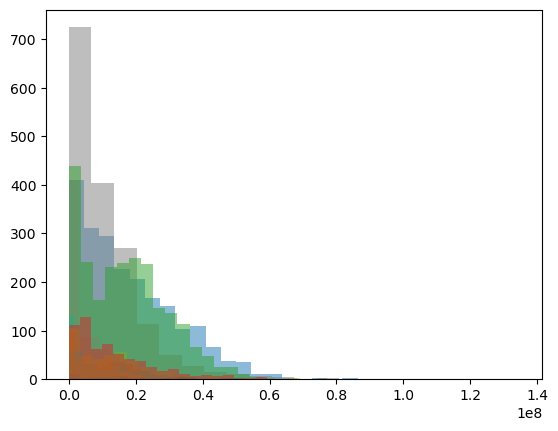

In [330]:
for g in gr:
    plt.hist(g[1]["produced_co2_g"], bins = 20, alpha = 0.5)
plt.show()

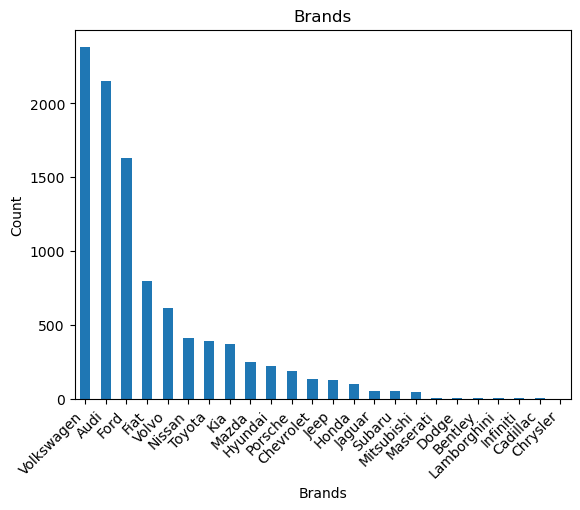

In [333]:
# Bars to visualize the fuel types
test_df["brand"].value_counts() \
    .plot(kind="bar")
plt.xlabel("Brands")
plt.ylabel("Count")
plt.title("Brands")
plt.xticks(rotation=45, ha='right')
plt.show()

In [401]:
test_df

,brand,model,co2_emissions_mean(g/km),mileage,fuel,gear,offerType,price,hp,year,produced_co2_g,produced_co2_tons
0,Audi,A3,204.56,276000,Diesel,Manual,Used,4900,140.0,2012,56458560.00,56.458560
1,Audi,A3,204.56,15500,Gasoline,Manual,Used,27940,150.0,2019,3170680.00,3.170680
2,Audi,A3,204.56,66000,Gasoline,Automatic,Used,17990,150.0,2018,13500960.00,13.500960
3,Audi,A3,204.56,14900,Electric/Gasoline,Automatic,Demonstration,34750,204.0,2020,3047944.00,3.047944
4,Audi,A3,204.56,9986,Gasoline,Automatic,Used,34950,150.0,2020,2042736.16,2.042736
...,...,...,...,...,...,...,...,...,...,...,...,...
10038,Volvo,XC90,244.64,11223,Electric/Gasoline,Automatic,Used,62450,250.0,2020,2745594.72,2.745595
10039,Volvo,XC90,244.64,19200,Diesel,Automatic,Used,66990,235.0,2020,4697088.00,4.697088
10040,Volvo,XC90,244.64,1000,Diesel,Automatic,Demonstration,69890,235.0,2021,244640.00,0.244640
10041,Volvo,XC90,244.64,5,Diesel,Automatic,Demonstration,93550,235.0,2021,1223.20,0.001223
